In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [7]:
# Renaming the columns
df.rename(columns={'v1':'Result', 'v2':'SMS'}, inplace=True)
df

,Result,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
!pip install scikit-learn

In [9]:
# Encoding Dependent variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Result'] = le.fit_transform(df['Result'])
df

,Result,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
# missing values
df.isnull().sum()

Result    0
SMS       0
dtype: int64

In [11]:
# check for duplicate values
df.duplicated().sum()

403

In [12]:
# remove duplicates
df = df.drop_duplicates(keep='first')

# 2. EDA (Exploratory Data Analysis)

In [13]:
df['Result'].value_counts()

0    4516
1     653
Name: Result, dtype: int64

In [14]:
!pip install matplotlib

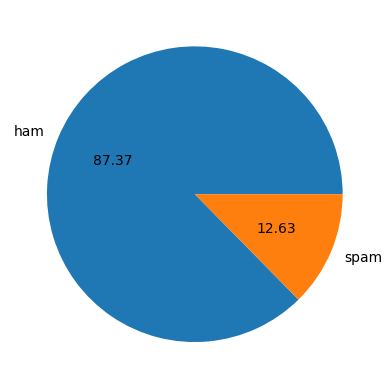

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['Result'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()    # Data is imbalance

In [16]:
!pip install nltk

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91635\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['num_characters'] = df['SMS'].apply(len)   # Number of characters
df.head()

C:\Users\91635\AppData\Local\Temp\ipykernel_16812\1234869531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['SMS'].apply(len)   # Number of characters


,Result,SMS,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
# Number of words
df['num_words'] = df['SMS'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

C:\Users\91635\AppData\Local\Temp\ipykernel_16812\1535833001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['SMS'].apply(lambda x:len(nltk.word_tokenize(x)))


,Result,SMS,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
df['SMS'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [21]:
df['num_sentences'] = df['SMS'].apply(lambda x: len(nltk.sent_tokenize(x)))
df

C:\Users\91635\AppData\Local\Temp\ipykernel_16812\4046549197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['SMS'].apply(lambda x: len(nltk.sent_tokenize(x)))


,Result,SMS,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [22]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
#ham describe
df[df['Result'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# spam describe
df[df['Result'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [25]:
!pip install seaborn

<Axes: xlabel='num_characters', ylabel='Count'>

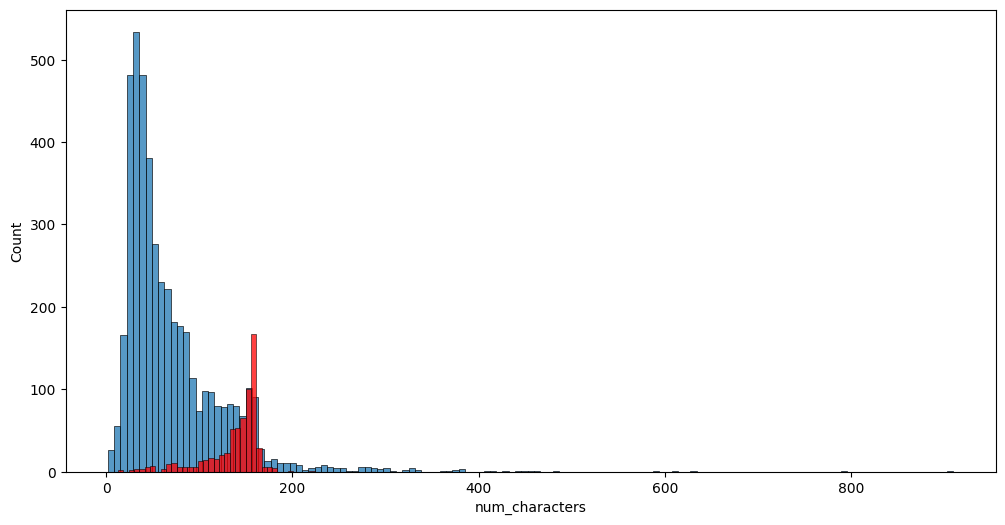

In [26]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['Result'] == 0]['num_characters'])
sns.histplot(df[df['Result'] == 1]['num_characters'], color='red')

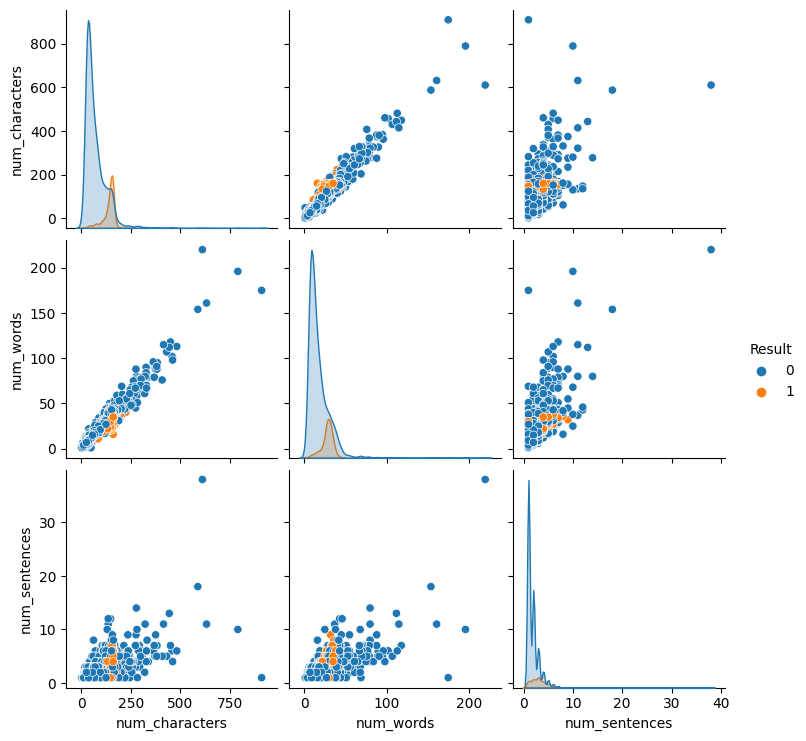

In [27]:
sns.pairplot(df, hue='Result')

In [28]:
df.corr()

C:\Users\91635\AppData\Local\Temp\ipykernel_16812\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Result,num_characters,num_words,num_sentences
Result,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


C:\Users\91635\AppData\Local\Temp\ipykernel_16812\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

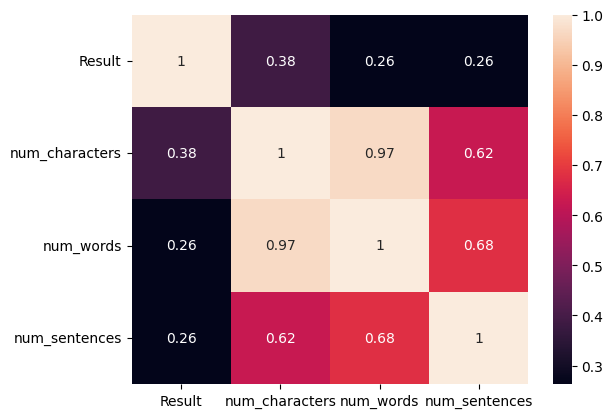

In [29]:
sns.heatmap(df.corr(), annot=True)

# 3. Data Preprocessing
1. Lower Case
2. Tokenization
3. Removing Special Characters
4. Removing Stop words and punctuation
5. Stemming

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91635\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

def transform_text(text):
    # 1. Lower case
    text = text.lower()
    
    # Tokenization - converting each word into list's element
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing Stop words and punctuations
    text = y.copy()
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    # Applying Stemming
    text = y.copy()
    y.clear()
    
    ps = PorterStemmer()
    
    for i in text:
        y.append(ps.stem(i))
                  
    return " ".join(y)

In [32]:
df['transformed_text'] = df['SMS'].apply(transform_text)
df

C:\Users\91635\AppData\Local\Temp\ipykernel_16812\2338056969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['SMS'].apply(transform_text)


,Result,SMS,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [33]:
!pip install wordcloud

In [34]:
# We use word cloud to emphasis all important words to easily distinguish ham and spam 
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['Result'] == 1]['transformed_text'].str.cat(sep=" "))

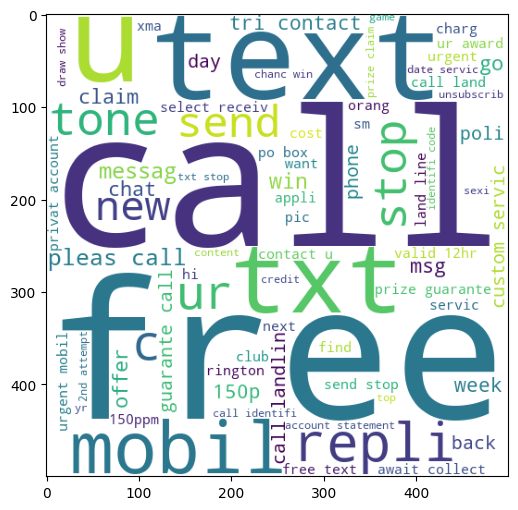

In [35]:
plt.figure(figsize=(12, 6))
plt.imshow(spam_wc)

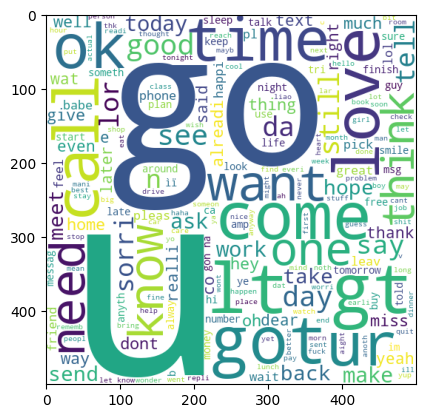

In [36]:
ham_wc = wc.generate(df[df['Result'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [37]:
spam_corpus = []
for msg in df[df['Result'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [38]:
len(spam_corpus)

9939

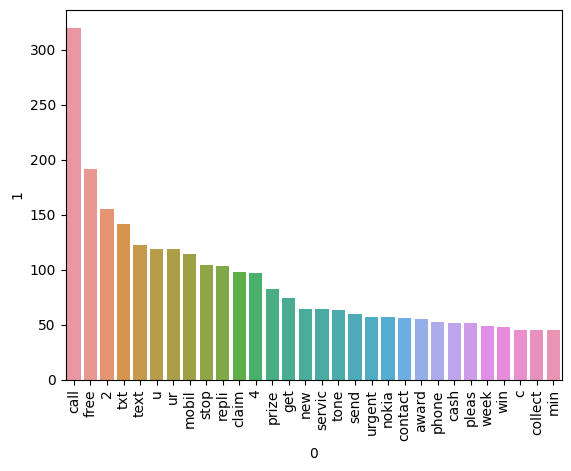

In [39]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [40]:
ham_corpus = []
for msg in df[df['Result'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [41]:
len(ham_corpus)

35404

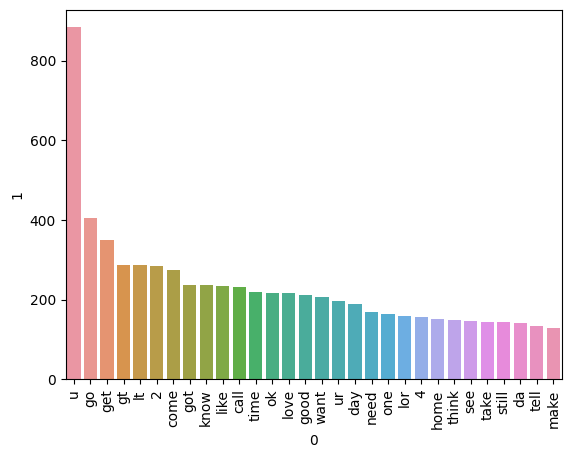

In [43]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [66]:
# Vectorize the text so as to predict using regression models
# Two methods of vectorizing the text: 1. Bag-of-words (making a column of frequent words) 2. TF-IDF (Term Frequency-Inverse Document Frequency) 3. Word2Vec
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()    # CountVectorizer means "Bag Of Words" method

In [45]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [46]:
X.shape

(5169, 6708)

In [140]:
y = df['Result'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [55]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [51]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [52]:
gnb.fit(X_train, y_train)

GaussianNB()

In [54]:
y_pred1 = gnb.predict(X_test)

In [56]:
accuracy_score(y_test, y_pred1)

0.8800773694390716

In [57]:
confusion_matrix(y_test, y_pred1)

array([[792, 104],
       [ 20, 118]], dtype=int64)

In [58]:
precision_score(y_test, y_pred1)

0.5315315315315315

In [63]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [64]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

# Accuracy and Precision score both are much better than other models

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [138]:
tfidf = TfidfVectorizer(max_features=3000)  # here 3000 is selected by try and error only to improve model performance

In [139]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [142]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [110]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [143]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

# Here FP is 0 means no legitimate messages are being wrongly flagged as spam

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [112]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [113]:
# Main focus should be on Precision Score
# Tfidf --> MNB is good among all Naive Bayes Algorithm with 0.95 and 1.0

In [114]:
!pip install xgboost

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [116]:
# Logistic Regression
lrc = LogisticRegression(solver='liblinear', penalty='l1')

# Support Vector Classifier (SVC)
svc = SVC(kernel='sigmoid', gamma=1.0)

# KNN Classifier
knn = KNeighborsClassifier()

# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=5)

# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

# Ada Boosting Classifier
ada = AdaBoostClassifier(n_estimators=50, random_state=2)

# Bagging
bc = BaggingClassifier(n_estimators=50, random_state=2)


# Extra trees classifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# Gradient Boosting Classifier
gbct = GradientBoostingClassifier(n_estimators=50, random_state=2)

# XG Boost Classifier
xg = XGBClassifier(n_estimators=50, random_state=2)

In [117]:
alg = {
    'SVC':svc,
    'KNN': knn,
    'NB': mnb,
    'DT': dt,
    'LR': lrc,
    'RF': rfc,
    'ADA': ada,
    'ET': etc,
    'BC': bc,
    'GB': gbct,
    'XG': xg
}

In [118]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [119]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [120]:
train_classifier(svc, x_train, y_train, x_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [121]:
accuracy_scores = []
precision_scores = []

for key, value in alg.items():
    current_accuracy, current_precision = train_classifier(value, x_train, y_train, x_test, y_test)
    print("\nFor ", key)
    print("Accuracy ", current_accuracy)
    print("Prediction ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy  0.9758220502901354
Prediction  0.9747899159663865

For  KNN
Accuracy  0.9052224371373307
Prediction  1.0

For  NB
Accuracy  0.9709864603481625
Prediction  1.0

For  DT
Accuracy  0.9303675048355899
Prediction  0.8367346938775511

For  LR
Accuracy  0.9584139264990329
Prediction  0.9702970297029703

For  RF
Accuracy  0.9758220502901354
Prediction  0.9829059829059829

For  ADA
Accuracy  0.960348162475822
Prediction  0.9292035398230089

For  ET
Accuracy  0.9748549323017408
Prediction  0.9745762711864406

For  BC
Accuracy  0.9584139264990329
Prediction  0.8682170542635659

For  GB
Accuracy  0.9468085106382979
Prediction  0.9191919191919192

For  XG
Accuracy  0.9671179883945842
Prediction  0.9333333333333333


In [122]:
performance_df = pd.DataFrame({'Algorithm': alg.keys(), 'Accuracy': accuracy_scores, 'Precision':precision_scores})
performance_df = performance_df.sort_values(['Precision', 'Accuracy'], ascending=False)
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.970986,1.000000
1,KNN,0.905222,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
7,ET,0.974855,0.974576
4,LR,0.958414,0.970297
10,XG,0.967118,0.933333
6,ADA,0.960348,0.929204
9,GB,0.946809,0.919192
8,BC,0.958414,0.868217


In [123]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.970986
1,KNN,Accuracy,0.905222
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ET,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,XG,Accuracy,0.967118
7,ADA,Accuracy,0.960348
8,GB,Accuracy,0.946809
9,BC,Accuracy,0.958414


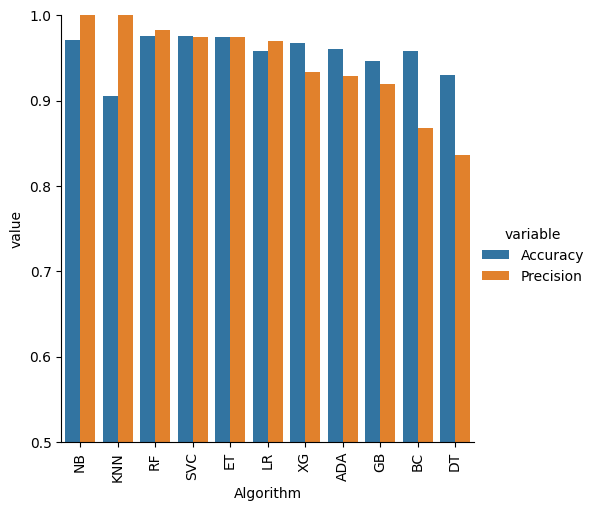

In [124]:
# Visualizing the accuracy and precision score
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [125]:
# We have to improve model 
# For that:
# 1. Change the max_features parameter of Tfidf (here max_features means whenever we vectorize the text, for how many we want to perform vectorization)
# 2. we also tried feature scaling, but that decreased the best model's accuracy
# 3. We lastly try performing Voting Classifier (that is combining best performing model together)

In [127]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [128]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [129]:
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [131]:
y_pred = voting.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))   # Precison reduced from 1.0 to 0.99

Accuracy:  0.9816247582205029
Precision:  0.9917355371900827


In [133]:
# Applying Stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [135]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))

Accuracy:  0.9787234042553191
Precision:  0.9328358208955224


In [ ]:
# After comparing the previously performed models with improved model, we can say that Naive Bayes is the best algorithm for this dataset.

In [144]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))